## 서포트 백신 머신
차수를 높인다. 발산할 수 있다. minmaxscaler 전처리가 필요하다. <br>
중규모 데이터에 적합 <br>
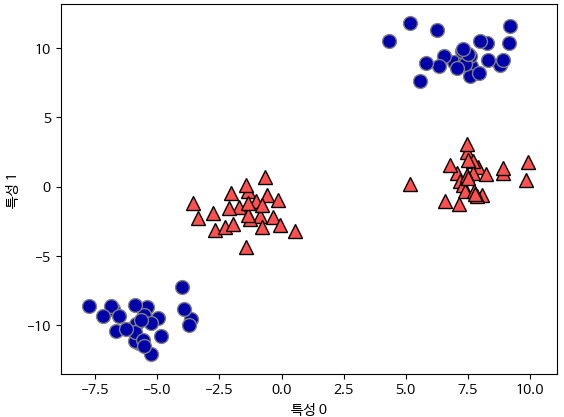
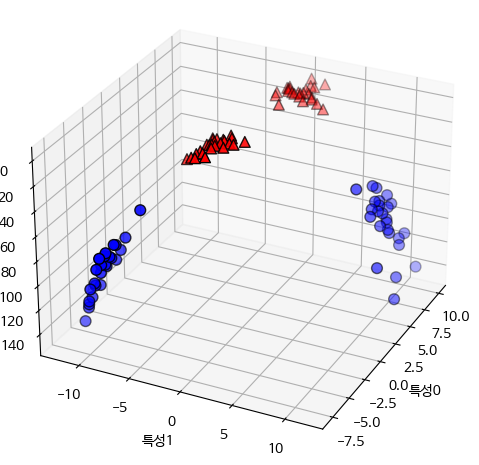
2차원데이터에 차수를 높여 3차원으로 만든 것이다

포물선 데이터는 스포츠과학에서 쓴다.(골프, 탁구, 농구, 야구)

선형쪽 데이터셋은 선형모델을 베이스로 잡고 svm해본다 <br />
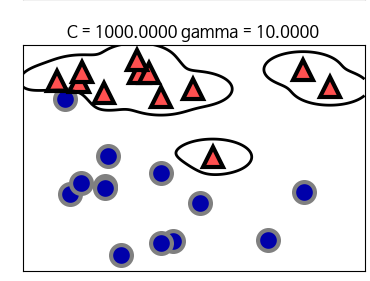

대규모 데이터셋은 엑셀로 안 열리고 경향성도 보이지 않는다

### SVC (분류)

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=42)
svc =  SVC()

svc  .fit(X_train, y_train)
print(svc  .score(X_train , y_train),svc  .score(X_test, y_test))

0.9178403755868545 0.9230769230769231


In [7]:
#minmaxscaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=42)

#전처리 직접(분석시에 사용하지 마세요.3장 참고하세요)
#axis=0으로 특성별 최소값 계산하면 리스트로 결과 나온다.
min_on_train=X_train.min(axis=0)
#axis=0으로 최대값-최소값 범위 계산하면 리스트로 결과 나온다.
range_on_train=(X_train-min_on_train).max(axis=0)
#넘파이, 판다스에서는 numpy객체로 리스트의 요소별 연산이 가능하다. 
#print(range_on_train)
X_train_scaled=(X_train-min_on_train)/range_on_train

min_on_test=X_test.min(axis=0)
range_on_test=(X_test-min_on_test).max(axis=0)
X_test_scaled=(X_test-min_on_test)/range_on_test

svc =  SVC() #0.9788732394366197 0.972027972027972
#svc =  SVC(C=20) #0.9929577464788732 0.951048951048951
svc  .fit(X_train_scaled, y_train)
print(svc  .score(X_train_scaled , y_train),svc  .score(X_test_scaled, y_test))

0.9788732394366197 0.972027972027972


svm의 svc(분류)은 차수를 증가시켜 초평면을 끼우면서 일정한 간격을 유지하며 벌어져서 복잡한 결정 경계를 만들 수 있다. <br />
커널 SVM에서 중요한 매개변수는 규제 매개변수 C이고 어떤 커널을 사용할지와 각 커널에 따른 매개변수이다. <br />



### SVC (회귀)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import pandas as pd
import numpy as np

ram_prices = pd.read_csv("data/ram_price.csv")
data_train = ram_prices[ram_prices.date <2000]
data_test = ram_prices[ram_prices.date>=2000]

#가격 예측을 위해 날짜 특성만을 이용한다.
X_train=data_train.date.to_numpy()[:,np.newaxis]
y_train=np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
svr=SVR()
svrfigure = svr.fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행(시계열 데이터는 대부분 전체기간을 예측데이터로 쓴다.)
X_all=ram_prices.date.to_numpy()[:,np.newaxis]  

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_svr = svrfigure .predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_svr)

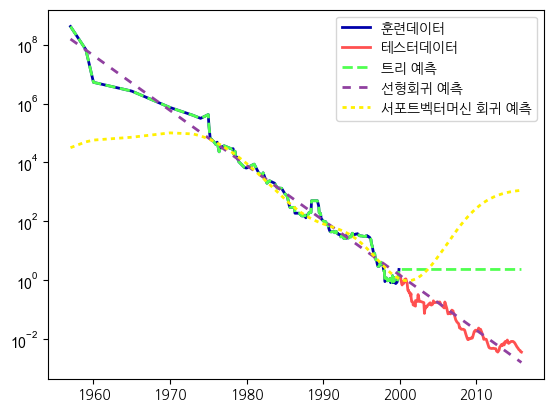

In [19]:
import matplotlib.pyplot as plt
import preamble
plt.yticks(fontname='Arial')
plt.semilogy(data_train.date, data_train.price, label ="훈련데이터")
plt.semilogy(data_test.date, data_test.price, label ="테스터데이터")
plt.semilogy(ram_prices.date, price_tree, label ="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label ="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label ="서포트벡터머신 회귀 예측")
plt.legend()

### 딥러닝
단 하나의 방정식으로 풀 수 없다고 가정 (예-XOR은 AND, NAND, OR 3개로 풀 수 있다.)


#### 1) 지도학습

In [14]:
def AND(x1, x2):
    w1, w2, theta = 0.5,0.5,0.7
    tmp = w1*x1 +w2*x2
    if tmp<= theta:
        return 0
    elif tmp>theta :
        return 1

In [15]:
print(AND(0,0),AND(0,1),AND(1,0),AND(1,1))

0 0 0 1


In [16]:
def OR(x1, x2):
    w1, w2, theta = 0.5,0.5,0.3
    tmp = w1*x1 +w2*x2
    if tmp<= theta:
        return 0
    elif tmp>theta :
        return 1

In [17]:
print(OR(0,0),OR(0,1),OR(1,0),OR(1,1))

0 1 1 1


In [21]:
def NAND(x1, x2):
    w1, w2, theta = 0.5,0.5,0.7
    tmp = w1*x1 +w2*x2
    if tmp<= theta:
        return 1
    elif tmp>theta :
        return 0

In [23]:
print(NAND(0,0),NAND(0,1),NAND(1,0),NAND(1,1))

1 1 1 0


In [24]:
def XOR(x1, x2):
    s1=NAND(x1, x2)
    s2=OR(x1, x2)
    return AND(s1, s2)
print(XOR(0,0),XOR(0,1),XOR(1,0),XOR(1,1))

0 1 1 0


#### 2)비지도학습

In [2]:
from preamble import *

#### k-mean 군집

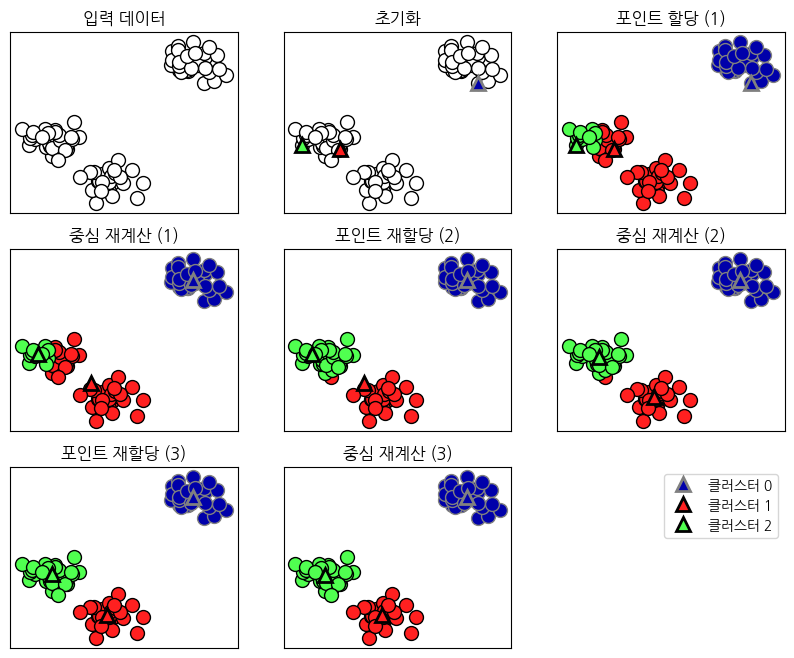

In [26]:
mglearn.plots.plot_kmeans_algorithm()

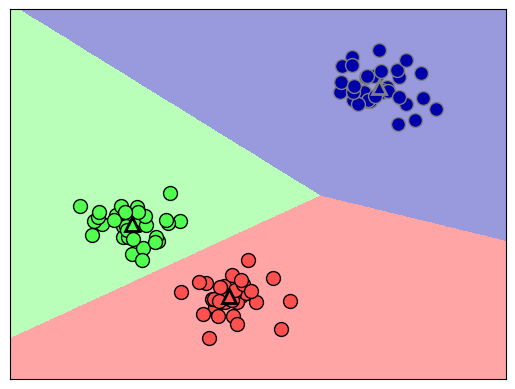

In [27]:
mglearn.plots.plot_kmeans_boundaries()

svm의 svc해도 결과가 잘 나온다. 위의 그림을 보면 경계가 뚜렷하기에 초록색과 빨간색 사이의 간격을 같게만 조절하면 된다.

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


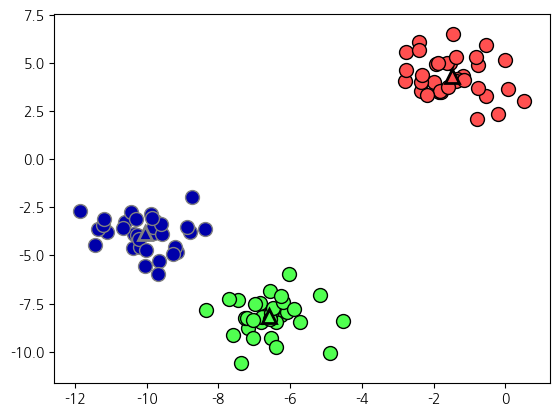

In [29]:
# discrete_scatter() 위치 : __init__.py ->.tools.py ->.plot_helpers.py 
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show() # 책에는 없음

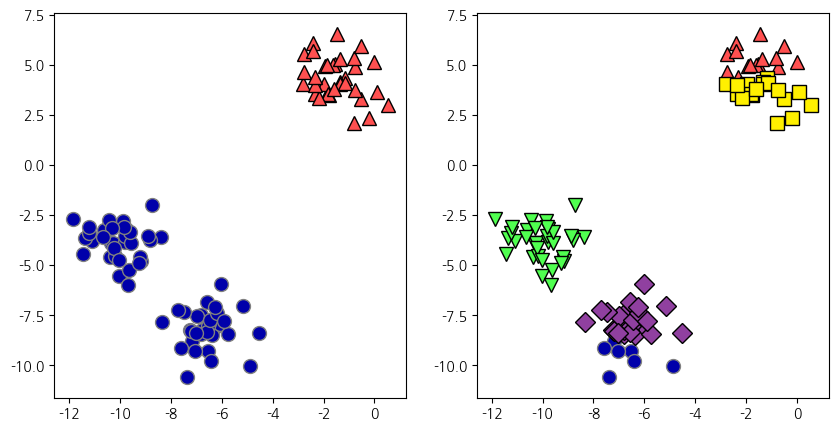

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show() # 책에는 없음

n_clusters=5보다 n_clusters=2가 낫다. 즉 n_clusters를 잘 잡아야한다.

### k-mean을 사용해서 어려운 경우

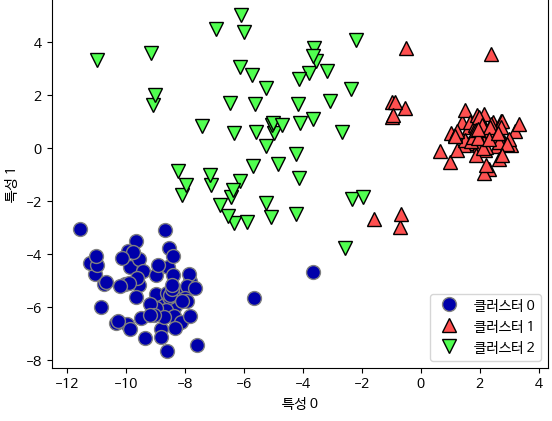<br />
비지도는 눈으로 그래프를 확인이 필요하다 <br />
빨강, 파랑은 눈으로 확신하니 빼고 빨강, 파랑의 에지부분과 나머지 초록부분을 전처리를 통해 학습이 필요하다. <br/>
회사에서 데이터가 6개월 데이터 중 3개월만 있을 때, 보통 저렇게 그래프가 나온다.

# 엘보우 방법

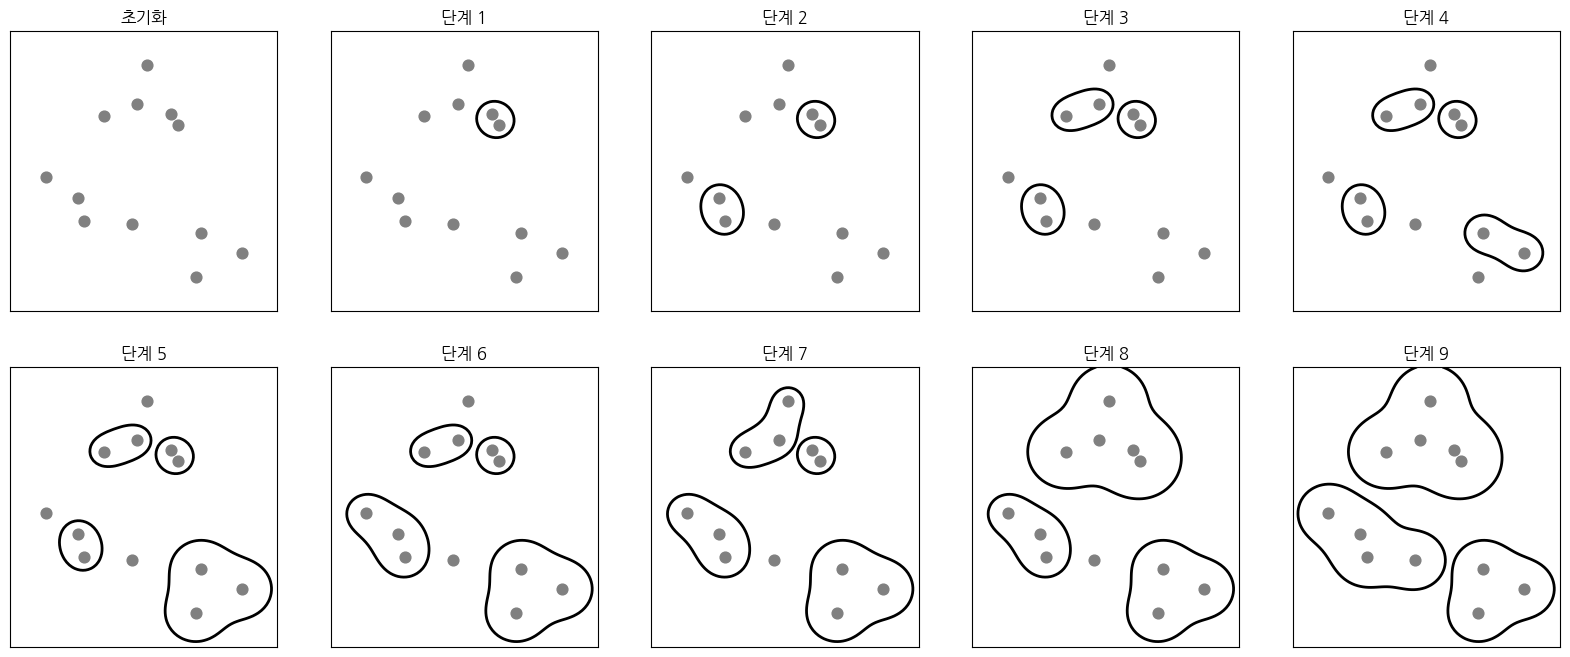

In [3]:

# k-mean과 유사
# 간격이 가까운 것끼리 묶는다
mglearn.plots.plot_agglomerative_algorithm()

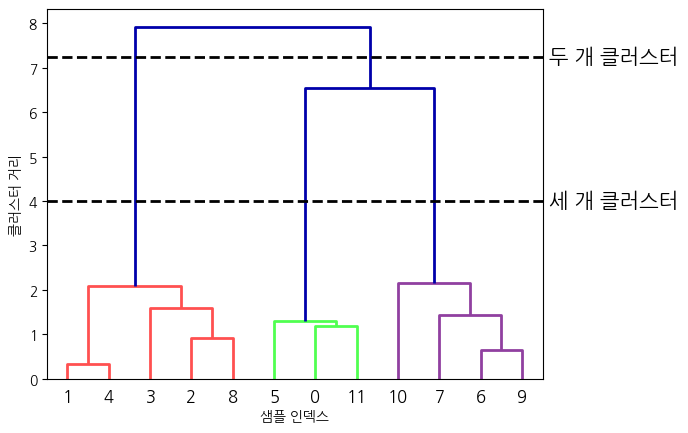

In [33]:
#dendrograms
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 인덱스")
plt.ylabel("클러스터 거리")
plt.show()

k-mean : 데이터 군집화가 잘 되어있을 때 쓴다. 적절한 n_clusters 계산 필요  <br />
        흩뿌려진 데이터 처리가 어렵다. <br />
DBSCAN : n_clusters 계산 필요 없다.<br />
        k-mean보다 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.

### 비지도학습 예제  : 데이터가져오기(숫자), 임의의 y값 가정, n_clusters 조절


주식을 비롯해서 자산가치를 형성하는 몇몇 방법이 있다. 이때, 투자 안정성을 위해서 분산 투자를 하려고 한다. 우리가 주식을 투자방법으로 결정하고, 나머지 포트폴리오를 구성하는 방법을 결정하세요. 단, 수익율이 가장 높은 포트폴리오를 구성해주세요.

참고자료 https://github.com/FinanceData/FinanceDataReader

준비
terminal에서 설치 pip install finance-datareader

In [8]:
import FinanceDataReader as fdr
#한국주식

#미국주식
#일본주식
#달러/원화
#비트코인/원화
#10년 만기 미국국채 수익률

#문제점 1) 비트코인 데이터가 10년치가 없다 <br/>
#문제점 2) 인덱스가 날짜이다. 나라별 na값 발생-> na지움 또는 그냥 무시하고 실행

In [12]:
# KOSPI Index 코스피 지수 데이터 (국내)
fdr.DataReader('KS11').head() # 2020-01-01 ~ 현재

#CLOSE 값이 전날기준보다 높으면 수익률이 높다라고 해석
#예 )20200102 2175.17 < 20200103 2176.46

1 001 2001-06-11 00:00:00 2003-06-10 00:00:00
1 001 2003-06-11 00:00:00 2005-06-10 00:00:00
1 001 2005-06-11 00:00:00 2007-06-10 00:00:00
1 001 2007-06-11 00:00:00 2009-06-10 00:00:00
1 001 2009-06-11 00:00:00 2011-06-10 00:00:00
1 001 2011-06-11 00:00:00 2013-06-10 00:00:00
1 001 2013-06-11 00:00:00 2015-06-10 00:00:00
1 001 2015-06-11 00:00:00 2017-06-10 00:00:00
1 001 2017-06-11 00:00:00 2019-06-10 00:00:00
1 001 2019-06-11 00:00:00 2021-06-10 00:00:00
1 001 2021-06-11 00:00:00 2023-06-10 00:00:00
1 001 2023-06-11 00:00:00 2025-06-10 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2001-06-11,612.46,615.41,607.20,608.23,340123834,-0.0218,2,-13.55,1711354887650,213769808029580
2001-06-12,605.36,611.88,603.91,607.15,319877548,-0.0018,2,-1.08,1579309434050,213407866089170
2001-06-13,611.79,614.05,607.48,614.05,392415108,0.0114,1,6.90,1882785913600,215722300556140
2001-06-14,612.96,623.37,610.36,613.75,420520519,-0.0005,2,-0.30,2138122210150,215864633350565
2001-06-15,609.54,618.96,604.37,618.96,375830101,0.0085,1,5.21,1984248114150,217830955673590


In [9]:
# US market Indices 미국 시장 지수 데이터
fdr.DataReader('IXIC').head() 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,148.169998,148.169998,148.169998,148.169998,148.169998,0
1980-01-03,145.970001,145.970001,145.970001,145.970001,145.970001,0
1980-01-04,148.020004,148.020004,148.020004,148.020004,148.020004,0
1980-01-07,148.619995,148.619995,148.619995,148.619995,148.619995,0
1980-01-08,150.679993,150.679993,150.679993,150.679993,150.679993,0


In [13]:
 # 일본 닛케이지수 (N225 - Nikkei 225)
fdr.DataReader('N225')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-04,6560.160156,6560.160156,6560.160156,6560.160156,6560.160156,0.0
1980-01-07,6552.649902,6552.649902,6552.649902,6552.649902,6552.649902,0.0
1980-01-08,6563.279785,6563.279785,6563.279785,6563.279785,6563.279785,0.0
1980-01-09,6591.830078,6591.830078,6591.830078,6591.830078,6591.830078,0.0
1980-01-10,6594.009766,6594.009766,6594.009766,6594.009766,6594.009766,0.0
...,...,...,...,...,...,...
2024-07-11,42343.718750,42426.769531,42102.460938,42224.019531,42224.019531,123000000.0
2024-07-12,41668.859375,41754.761719,41188.289063,41190.679688,41190.679688,130400000.0
2024-07-16,41366.789063,41520.070313,41220.648438,41275.078125,41275.078125,100800000.0


In [14]:
fdr.DataReader('BTC/KRW') # 비트코인/원화

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4.826118e+05,4.838110e+05,4.681210e+05,4.732035e+05,4.732035e+05,2.178747e+10
2014-09-18,4.727130e+05,4.762765e+05,4.309914e+05,4.428182e+05,4.428182e+05,3.597632e+10
2014-09-19,4.424667e+05,4.475154e+05,4.012784e+05,4.119893e+05,4.119893e+05,3.957110e+10
2014-09-20,4.118610e+05,4.417305e+05,4.068624e+05,4.267118e+05,4.267118e+05,3.846901e+10
2014-09-21,4.258571e+05,4.303872e+05,4.103040e+05,4.161897e+05,4.161897e+05,2.773766e+10
...,...,...,...,...,...,...
2024-07-14,7.963030e+07,8.221321e+07,7.947589e+07,8.144986e+07,8.144986e+07,2.348679e+13
2024-07-15,8.144064e+07,8.435206e+07,8.144064e+07,8.358990e+07,8.358990e+07,3.055964e+13
2024-07-16,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 환율: 여러 조합 가능(지원 심볼: ['KRW', 'EUR', 'CNY', 'JPY', 'CHF'])
fdr.DataReader('USD/KRW') # 달러 원화

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0.0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0.0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0.0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0.0
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0.0
...,...,...,...,...,...,...
2024-07-12,1371.270020,1379.449951,1368.770020,1371.270020,1371.270020,0.0
2024-07-15,1374.109985,1383.670044,1374.010010,1374.109985,1374.109985,0.0
2024-07-16,1383.689941,1387.140015,1381.050049,1383.689941,1383.689941,0.0


In [11]:
 # 10년 만기 미국국채 수익률
fdr.DataReader('US10YT')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,10.500,10.500,10.500,10.500,10.500,0.0
1980-01-03,10.600,10.600,10.600,10.600,10.600,0.0
1980-01-04,10.660,10.660,10.660,10.660,10.660,0.0
1980-01-07,10.630,10.630,10.630,10.630,10.630,0.0
...,...,...,...,...,...,...
2024-07-11,4.288,4.290,4.168,4.193,4.193,0.0
2024-07-12,4.206,4.239,4.187,4.189,4.189,0.0
2024-07-15,4.237,4.241,4.200,4.229,4.229,0.0


데이터를 살펴본 결과를 바탕으로 세운 전략<br />
기간 7년 <br />
column  Open	High	Low  	Close 

1)데이터 수집

In [16]:
import FinanceDataReader as fdr
ks11 = fdr.DataReader('KS11', '2016-01-01', '2023-12-31')
ixic = fdr.DataReader('IXIC', '2016-01-01', '2023-12-31')
n225 =fdr.DataReader('N225', '2016-01-01', '2023-12-31')
usd_krw=fdr.DataReader('USD/KRW', '2016-01-01', '2023-12-31')
btc_krw=fdr.DataReader('BTC/KRW', '2016-01-01', '2023-12-31')
us10yt=fdr.DataReader('US10YT', '2016-01-01', '2023-12-31')

1 001 2016-01-01 00:00:00 2017-12-31 00:00:00
1 001 2018-01-01 00:00:00 2019-12-31 00:00:00
1 001 2020-01-01 00:00:00 2021-12-31 00:00:00
1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


2) 전처리<br />
column을 open, high, low, close로 처리 <br />
인덱스가 날짜인 경우, 옆으로 이어서 합친다. <br /> 
column이 중복된다. open, high, low close를 Series로 합친다.<br /> 
수익률 계산 with iloc, rolling https://stackoverflow.com/questions/48518338/rolling-difference-in-pandas

In [19]:
#rolling함수는 sum이기에 빼기는 rolling을 응용해서 만든다. apply()결과가 dataframe이 아니다.
def my_fun(x):
    return x.iloc[-1] - x.iloc[0]

ks11['Close'].rolling(window=2).apply(my_fun)
#12월31일 데이터가 있어야 현재년도의 1월1일 데이터가 nan이 되지 않는다.

Date
2016-01-04      NaN
2016-01-05    11.77
2016-01-06    -5.10
2016-01-07   -21.10
2016-01-08    13.29
              ...  
2023-12-21   -14.28
2023-12-22    -0.51
2023-12-26     3.08
2023-12-27    10.91
2023-12-28    41.78
Name: Close, Length: 1966, dtype: float64

In [20]:
ks11.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2016-01-04,1954.47,1954.52,1918.76,1918.76,359018283,-0.0217,2,-42.55,3966273691160,1215384387196179
2016-01-05,1911.93,1937.57,1911.93,1930.53,446548849,0.0061,1,11.77,4197593667227,1222621740423229
2016-01-06,1934.25,1934.25,1911.61,1925.43,594612859,-0.0026,2,-5.10,6274716917514,1219296930268774
2016-01-07,1915.71,1926.41,1901.24,1904.33,393042046,-0.0110,2,-21.10,5003024735272,1205546061634302
2016-01-08,1889.42,1918.25,1883.82,1917.62,430204496,0.0070,1,13.29,5205453870899,1213738732721558
